In [49]:
import pandas as pd
import numpy as np

In [50]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [51]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [52]:
X_train.shape

(60000, 28, 28)

In [53]:
y_train[0]

np.uint8(5)

In [54]:
X_train[0]#pixel values of 5

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

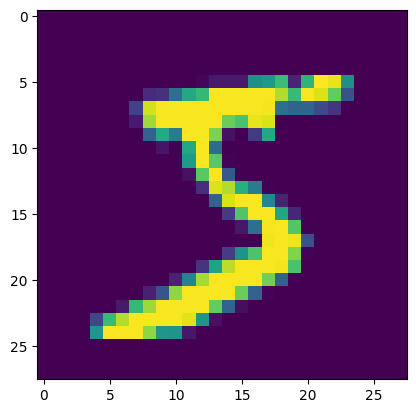

In [55]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [56]:
X_train = X_train/255
X_test = X_test/255

In [57]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

d:\RazonCoding\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [60]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8726 - loss: 0.4682 - val_accuracy: 0.9570 - val_loss: 0.1532
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9617 - loss: 0.1344 - val_accuracy: 0.9659 - val_loss: 0.1158
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9743 - loss: 0.0865 - val_accuracy: 0.9662 - val_loss: 0.1174
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9810 - loss: 0.0652 - val_accuracy: 0.9723 - val_loss: 0.0930
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9863 - loss: 0.0475 - val_accuracy: 0.9753 - val_loss: 0.0882
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9894 - loss: 0.0379 - val_accuracy: 0.9723 - val_loss: 0.0948
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9921 - loss: 0.0275 - val_accuracy: 0.9762 - val_loss: 0.0850
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9938 - loss: 0.02

In [61]:
y_prob = model.predict(X_test)
y_prob[0]#probabilities of each class

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([5.5949627e-11, 3.5799426e-11, 1.7939824e-08, 1.5296495e-05,
       2.6223062e-15, 1.9110432e-12, 1.7085216e-13, 9.9998462e-01,
       9.5768895e-09, 1.0542925e-07], dtype=float32)

In [62]:
y_pred = y_prob.argmax(axis=1)
y_pred[0]#predicted class

np.int64(7)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

97.64

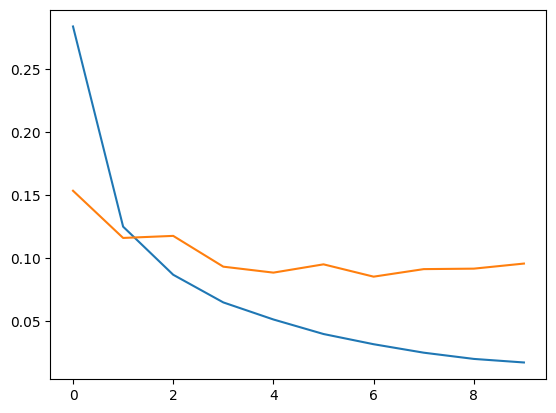

In [64]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')

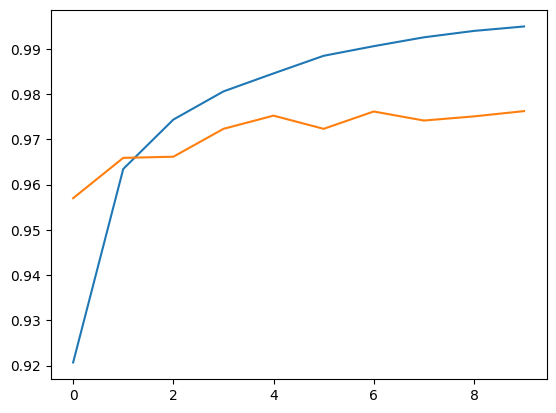

In [65]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')


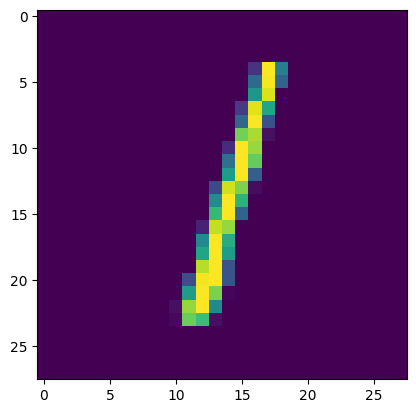

In [70]:
plt.imshow(X_test[2])

In [71]:
y_pred[2]

np.int64(1)